In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl as opx
import scipy.optimize as scy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

2023-12-03 16:20:06.721317: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-03 16:20:06.762336: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-03 16:20:06.763130: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-03 16:20:07.447922: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
nome='P_Suspensao'
# P_Suspensao 89%
# P_Manobrabilidade 93%
# P_Frenagem  bateu 100%
# P_Aceleration 87.8%
# P_Velocidade Final 93.6%
# P_Tracao 90.2%
# se utilizar 10% como test set

In [3]:
df=pd.read_excel(r'anonymizedData.xlsx',nome)
#nome='P_Tracao'

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### Achar quantidade de na por coluna

In [4]:
v=[]
for col in df.columns:
    v.append(df[col].isna().sum())

### Filtrar as colunas que possuam 700 ou menos termos Nan


In [5]:
v=pd.DataFrame(v).reset_index()
w=v[v[0]<700]['index']

In [6]:
df=df.iloc[:,w]

### Filtrar as colunas que possuam estabilidade menor que 400 termos na coluna


In [7]:
r=[]
for col in df.columns:
    r.append(len(df[col].value_counts()))
r=pd.DataFrame(r).reset_index()
w=r[(r[0]>400)]
w=w._append(r.iloc[-1]).index

In [8]:
df=df.iloc[:,w]


### Retirar as linhas que tem muitos Nan

In [9]:
S = df.drop(nome,axis=1)
r=[]
for index in df.index:
    r.append(len(S.loc[index,:].value_counts()))

In [10]:
r=pd.DataFrame(r).reset_index()
w=r[(r[0]>0.75*len(df.columns))]

df=df.iloc[w['index'],:]


### Preencher Nan com zeros

In [11]:
df=df.interpolate()

df=df.fillna(0)

### Criação de matriz de correlação

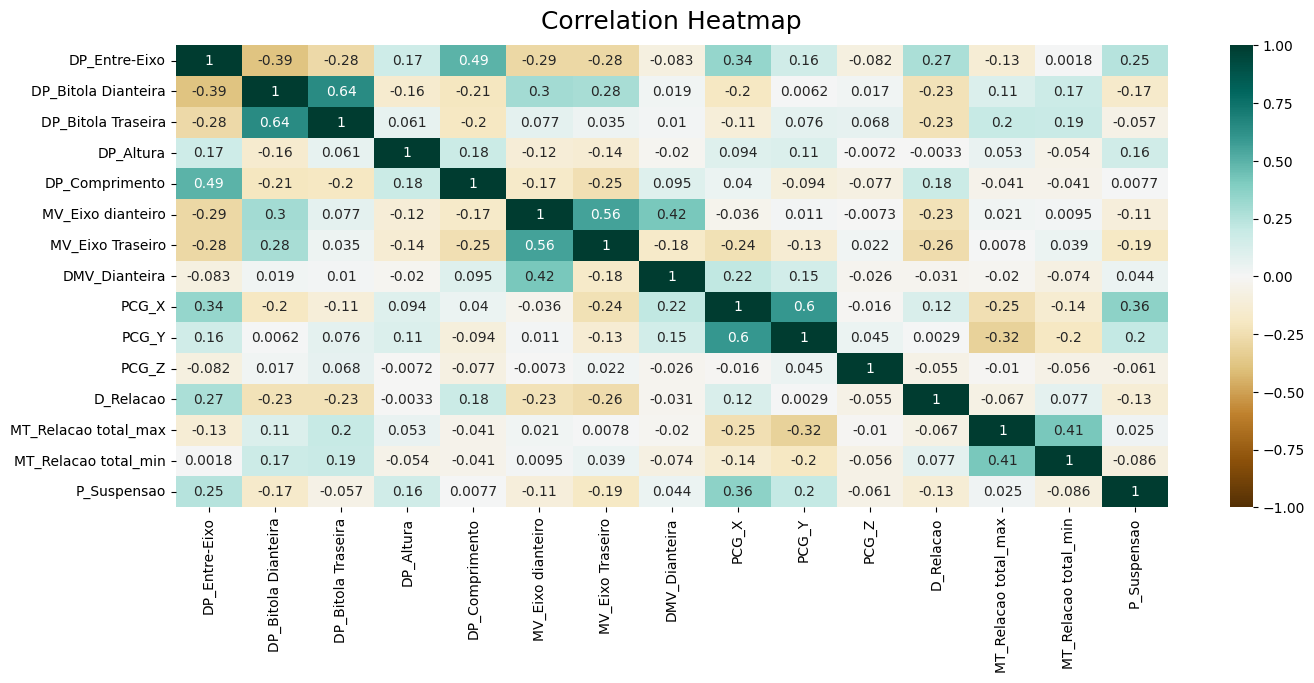

In [12]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped


In [13]:
X = df.drop(nome,axis=1)
y = df[nome]

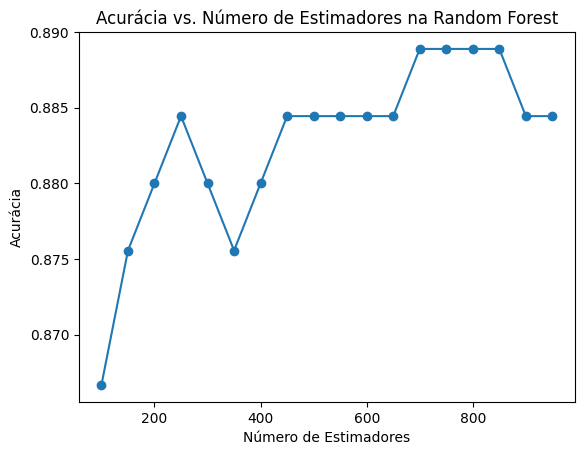

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Padronize os dados (é uma prática comum ao usar Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Varie o número de estimadores
num_estimators_range = range(100,1000,50)
accuracy_scores = []

for num_estimators in num_estimators_range:
    # Crie o modelo de Random Forest com o número atual de estimadores
    model = RandomForestClassifier(n_estimators=num_estimators, random_state=42,max_depth=2000,criterion='entropy')

    # Treine o modelo no conjunto de treinamento
    model.fit(X_train_scaled, y_train)

    # Faça previsões no conjunto de teste
    y_pred = model.predict(X_test_scaled)

    # Avalie a precisão do modelo e armazene
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)




# Plote a relação entre o número de estimadores e a acurácia
plt.plot(num_estimators_range, accuracy_scores, marker='o')
plt.title('Acurácia vs. Número de Estimadores na Random Forest')
plt.xlabel('Número de Estimadores')
plt.ylabel('Acurácia')
plt.show()



<Axes: xlabel='Predicted', ylabel='Actual'>

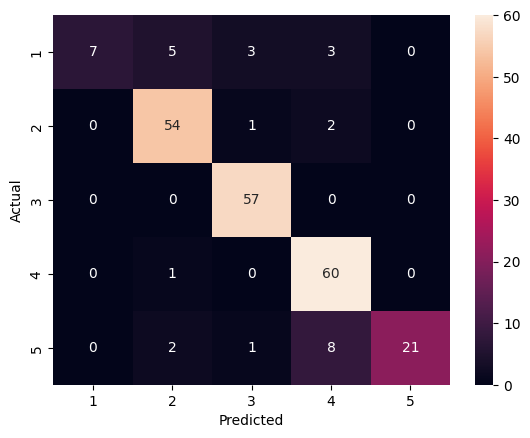

In [15]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)